Task 3:

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random


In [27]:
w0, w1, w2 = 1, 0, 1
v0,v1,v2 = 0,0,0
w0_best, w1_best, w2_best = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x1Test,x2Test,yTest = [],[],[]

In [28]:
def generate_pla(N,name_value,w0=0,w1=1,w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-10,10)
        stepY = w0 + w1*x1 + w2*x2
        if(stepY == 0):
            continue
        X1.append(x1)
        X2.append(x2)
        if(stepY > 0):
            Y.append(1)
        elif(stepY < 0):
            Y.append(-1)
        n += 1
    data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
    df = pd.DataFrame(data)
    df.drop([0], axis = 1, inplace=True)
    df.columns = ['x1', 'x2', 'y']

    df.to_csv(name_value, index=False)
    return data

w0_f, w1_f, w2_f = 1, 1, 1
generate_pla(100,'synthetic_dataset.csv', w0_f, w1_f, w2_f)
generate_pla(10000,'synthetic_dataset_test.csv', w0_f, w1_f, w2_f)




[array([ 1.        ,  6.97201251, -9.41487633, -1.        ]),
 array([ 1.        , -9.96476429, -7.40459482, -1.        ]),
 array([ 1.        ,  4.65044287, -7.19894967, -1.        ]),
 array([ 1.        , -9.95220166, -7.57265715, -1.        ]),
 array([ 1.        , -7.44482122, -3.0952446 , -1.        ]),
 array([ 1.        ,  8.1346273 , -4.99025687,  1.        ]),
 array([ 1.        , -2.88618449, -9.65480355, -1.        ]),
 array([1.        , 7.50787264, 5.07437593, 1.        ]),
 array([ 1.        ,  8.56673475, -6.0067202 ,  1.        ]),
 array([ 1.        , -7.71153078, -8.31156036, -1.        ]),
 array([1.        , 4.32730578, 7.81704368, 1.        ]),
 array([ 1.        , -9.72390041,  8.8754957 ,  1.        ]),
 array([ 1.        ,  5.87889301, -6.28691741,  1.        ]),
 array([ 1.        , -1.51961298, -5.87019638, -1.        ]),
 array([ 1.        ,  3.39579652, -7.56698572, -1.        ]),
 array([ 1.        ,  8.87186932, -9.74012609,  1.        ]),
 array([1.      

In [29]:
def fileRead(filenameValue):
    with open(filenameValue, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(float(values[2]))
    return x1,x2,y

def filereadTest(filenameValue):
    with open(filenameValue, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1Test.append(float(values[0]))
            x2Test.append(float(values[1]))
            yTest.append(float(values[2]))
    return x1Test,x2Test,yTest

In [30]:
def misClassifiedPoints():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

def PLA(n, weightLimit=1e30):
    global w0, w1, w2
    for iteration in range(1000):
        misClassified = misClassifiedPoints()
        if not misClassified:
            break

        for x1_misClassified, x2_misClassified, y_misClassified in misClassified:
            signal = w0 + w1 * x1_misClassified + w2 * x2_misClassified
            if y_misClassified * signal <= 1:
                w0 += n * (y_misClassified - signal)
                w1 += n * (y_misClassified - signal) * x1_misClassified
                w2 += n * (y_misClassified - signal) * x2_misClassified

        if abs(w0) > weightLimit or abs(w1) > weightLimit or abs(w2) > weightLimit:
            print("The update is discontinued as the weights approach infinity.")
            break




In [31]:
def calculateErrorPercentage(x1Test, x2Test, yTest, w0, w1, w2):
    numSamples = len(x1Test)
    misClassified = 0

    for i in range(numSamples):
        x1_sample, x2_sample = x1Test[i], x2Test[i]
        signal = w0 + w1 * x1_sample + w2 * x2_sample

        predictValue = 1 if signal >= 0 else -1

        if predictValue != yTest[i]:
            misClassified += 1

    percentageError = (misClassified / numSamples) * 100.0
    return percentageError


a)

The update is discontinued as the weights approach infinity.
Weights obtained for n = 100 --> w0:  7.689004803166426e+29    w1: -3.529170239122212e+30    w2:  6.097946276014455e+30
Error Percentage on Test Data: 39.88%


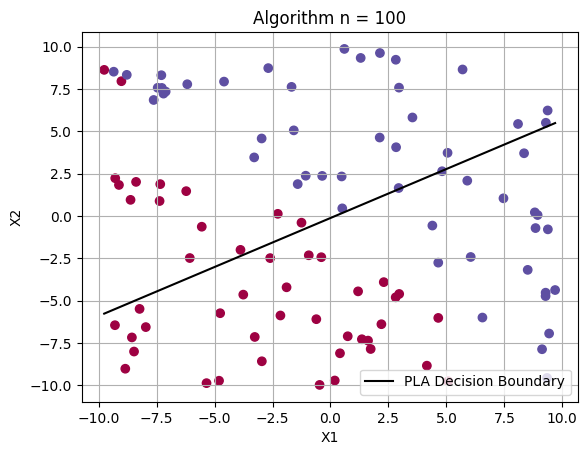

In [32]:
fileRead('synthetic_dataset.csv')
filereadTest('synthetic_dataset_test.csv')
PLA(100)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'black')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm n = 100')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 100 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
percentageError = calculateErrorPercentage(x1Test, x2Test, yTest, w0, w1, w2)
print(f"Error Percentage on Test Data: {percentageError:.2f}%")
plt.show()


b)

The update is discontinued as the weights approach infinity.
Weights obtained for n = 1 --> w0:  6.095144607511203e+30    w1: 5.548074964953625e+31    w2:  -2.6671674902098493e+31
Error Percentage on Test Data: 36.64%


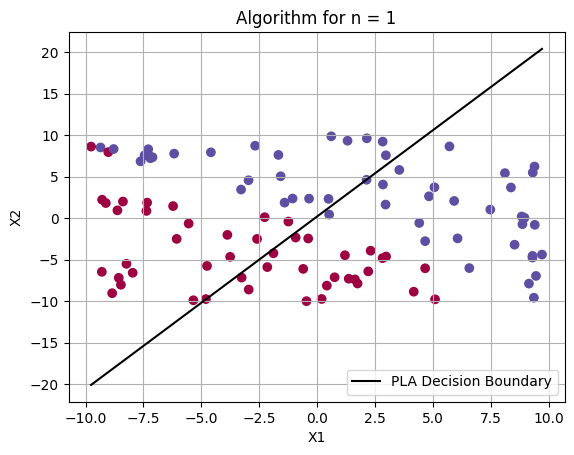

In [33]:
w0, w1, w2 = 1, 0, 1
PLA(1)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'black')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm for n = 1')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 1 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
percentageError = calculateErrorPercentage(x1Test, x2Test, yTest, w0, w1, w2)
print(f"Error Percentage on Test Data: {percentageError:.2f}%")
plt.show()




c)

Weights obtained from n = 0.01 --> w0:  2.981471732735299    w1: 2.821475785578703    w2:  3.061182926396927
Error Percentage on Test Data: 1.85%


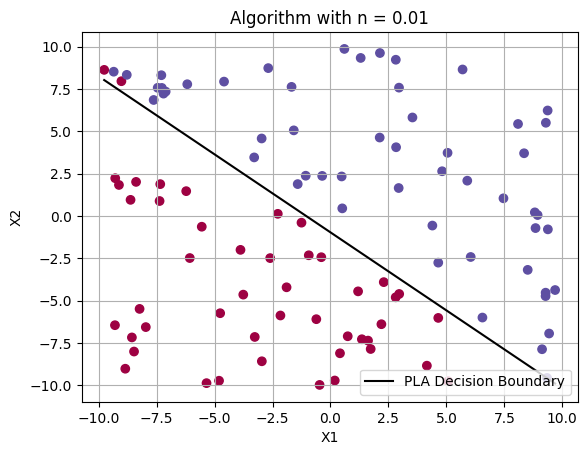

In [34]:
w0, w1, w2 = 1, 0, 1
PLA(0.01)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'black')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm with n = 0.01')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from n = 0.01 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
percentageError = calculateErrorPercentage(x1Test, x2Test, yTest, w0, w1, w2)
print(f"Error Percentage on Test Data: {percentageError:.2f}%")
plt.show()

D)

Weights obtained for n = 0.0001 --> w0:  0.8365152491234592    w1: 0.6745580125378318    w2:  0.6593558657618099
 Test Data Error Percentage: 1.19%


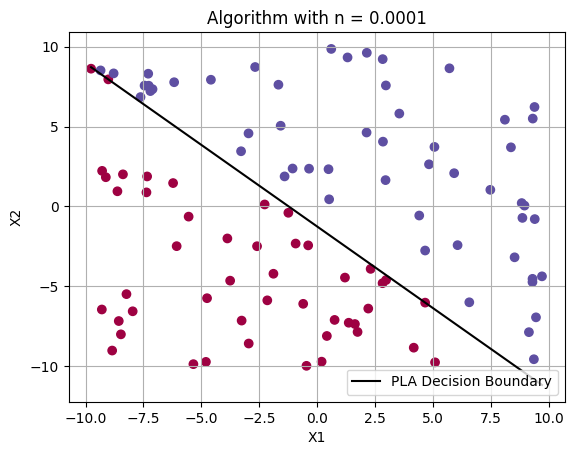

In [35]:
w0, w1, w2 = 1, 0, 1
PLA(0.0001)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'black')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm with n = 0.0001')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 0.0001 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
percentageError = calculateErrorPercentage(x1Test, x2Test, yTest, w0, w1, w2)
print(f" Test Data Error Percentage: {percentageError:.2f}%")
plt.show()

E) Here, the learning rate is represented by the n value. A high learning rate suggests that the weights converge more quickly, but it also makes the system more error-prone since each update shifts the line by a sizable amount. We can see this for the learning rate values of 100 and 1. The incremental updates for each weight are much more accurate when we lower the learning rate to 0.01 and 0.0001, and with the correct number of iterations, we will converge at the perfect weight value. We can see that the least mistake % is acquired at lower learning rates when we use 1000 iterations for this issue. Lower iterations might not show the same thing. However, we will typically obtain the lowest error rate with higher iterations and lower learning rates.